<a href="https://colab.research.google.com/github/amd3897/Prediction-of-Product-Sales/blob/main/Prediction_of_product_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predection of Product Sales
- Aziz M Duaibes

## Project overview

### Prediction of product sales
- Potential stakeholders: Grocery stores owners
- Primary goal: Make prediction of sales to increase profit
- What do they need?: Actionable insights/recommendations for which modifications they can make to increase their profits


## Load and Inspect Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
fname = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(fname)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df = df.set_index('Item_Identifier')
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

- There are 8523 rows and 12 columns
- The datatypes are float(4), integer(1), string/object(7)

In [6]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# check duplicates
df.duplicated().sum()
# no duplicated rows

0

In [8]:
# double check
df[df.duplicated()]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,


In [9]:
# identufy missing value
df.isna().sum()
# two columns have missing values (Item_Weight(float), Outlet_Size(object))

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# check consistency
# object columns
object_col = df.select_dtypes('object').columns
for col in object_col:
  print(f'Value Count for {col}\n{df[col].value_counts()}\n ')
# from details below you can find that Item_Fat_content has inconsistent values

Value Count for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
 
Value Count for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
 
Value Count for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
 
Value Count for Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtyp

In [11]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF','low fat'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [12]:
numeric_col = df.select_dtypes('number').columns
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

In [13]:
# display numeric columns
df.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [14]:
# import all required libraries
import matplotlib.pyplot as plt
import seaborn as sns

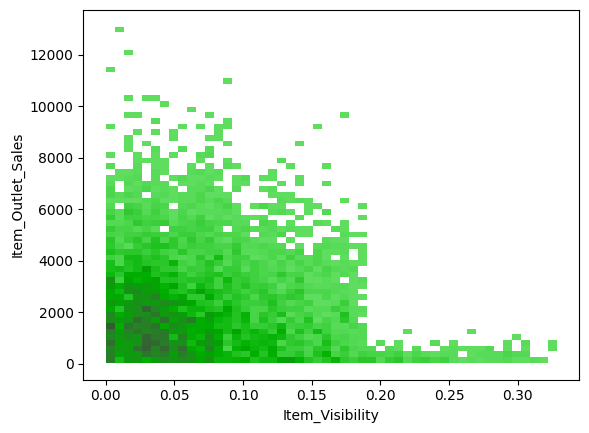

In [15]:
# Histograms to view the distributions of numerical features in your dataset
# visualize the relation between Item_Visibility and Item_Outlet_Sales
ax = sns.histplot(data=df, x='Item_Visibility', y='Item_Outlet_Sales', color='Green')

We can notice the more the item is visible the more it's likely to be sold

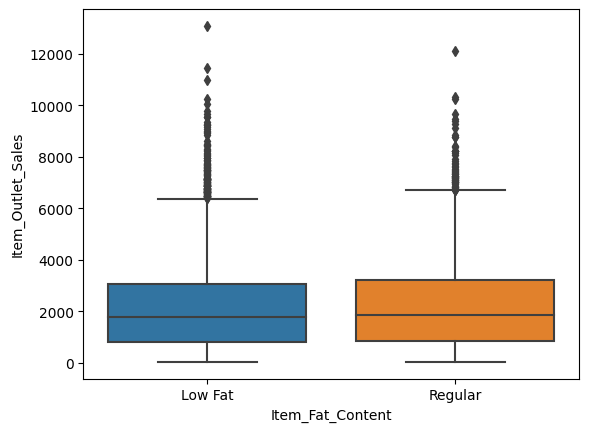

In [16]:
# Boxplots to view statistical summaries of numerical features in your dataset
# use boxplot to see if people buy products according to their fat content
ax = sns.boxplot(data=df, y='Item_Outlet_Sales', x='Item_Fat_Content')

Notice that customers don't really care about fat content, since low fat and regular fat items have nearly the same average sales, which is around 2000

In [17]:
# Countplots to view the frequency of each class of categorial features in your dataset
cat_col = df.select_dtypes('object').columns
df[cat_col].head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,,,,,,
FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


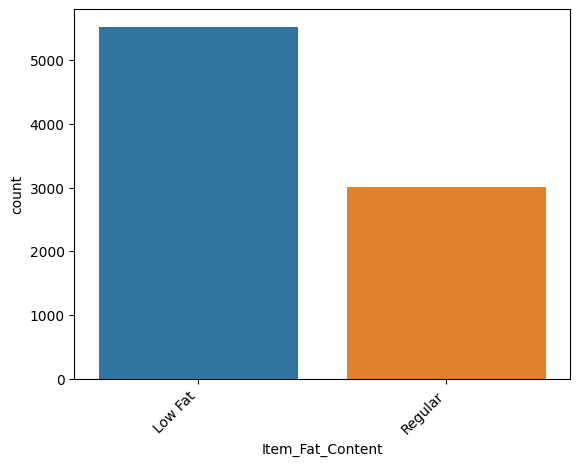

In [18]:
# use countplot
# use function
def cat_feature(col_name):
  ax = sns.countplot(data=df, x=col_name)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  return ax
cat_feature('Item_Fat_Content');

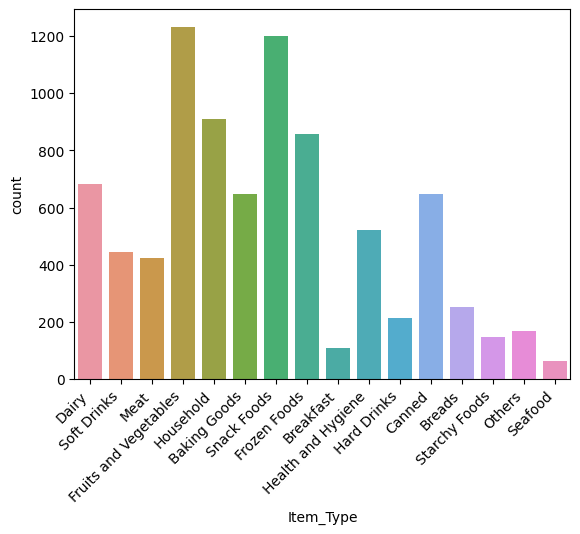

In [19]:
cat_feature('Item_Type');

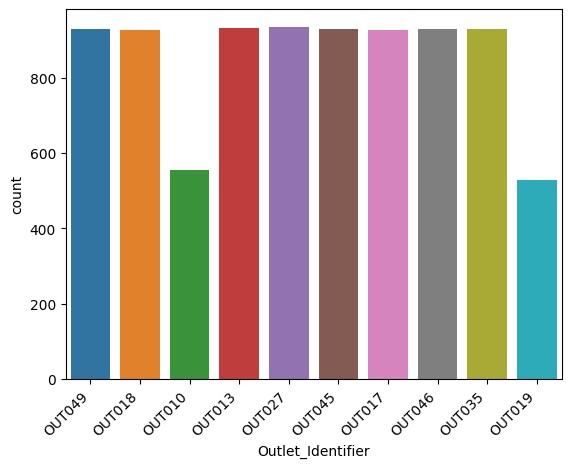

In [20]:
cat_feature('Outlet_Identifier');

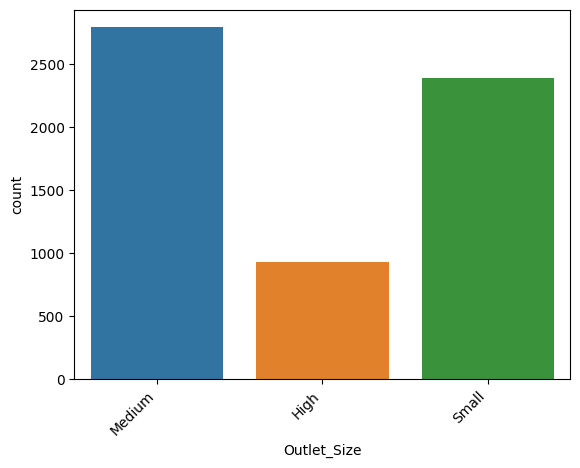

In [21]:
cat_feature('Outlet_Size');

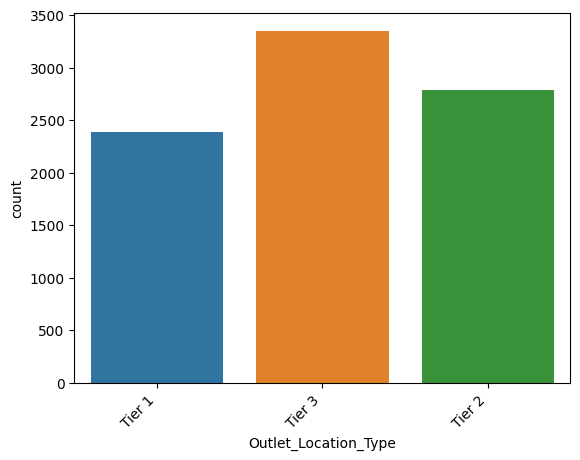

In [22]:
cat_feature('Outlet_Location_Type');

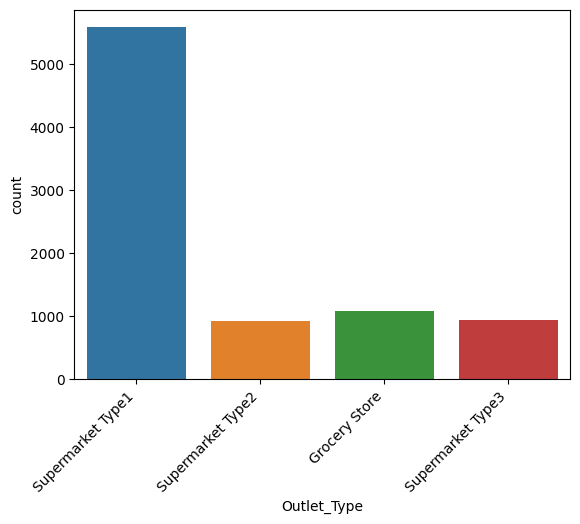

In [23]:
cat_feature('Outlet_Type');

We can see the counts for each categorical feature

<ipython-input-24-805c8b3e637e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(2);


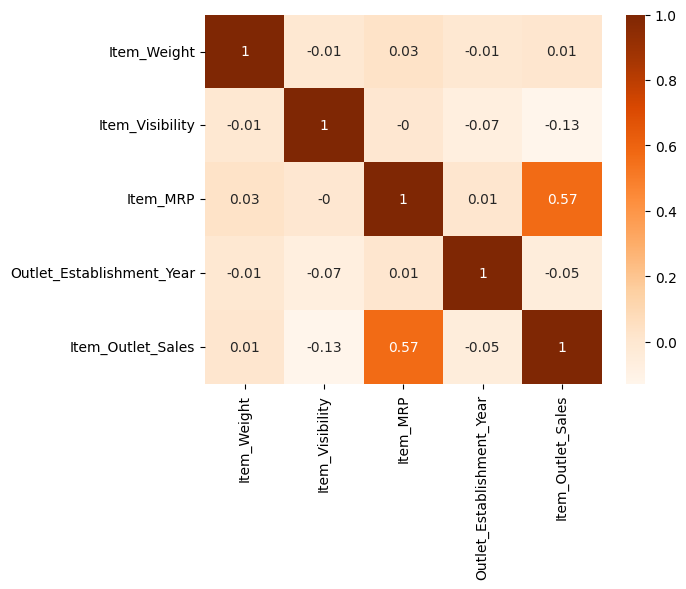

In [24]:
# Heatmap to view the correlation between features
corr = df.corr().round(2);
ax = sns.heatmap(corr, cmap='Oranges', annot=True);

Notice the strong correlations between Item_Weight & Outlet_Establishment_Year, Item_MRP & Item_Outlet_Sales

## Feature Inspection

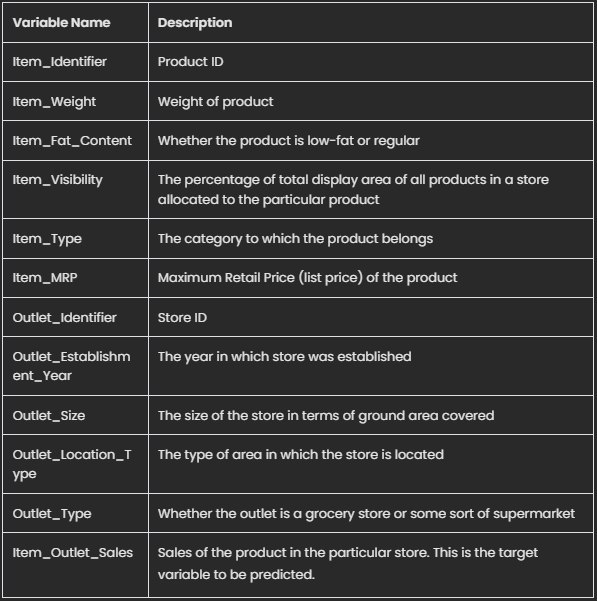

In [25]:
# explore categorical features
def explore_categorical(df, x, fillna=True, placeholder='NaN', order=None):
  df_copy = df.copy() # use a copy of the dataframe
  null_count=df_copy[x].isna().sum()
  null_percent=null_count/len(df_copy)*100
  # make if statement to decide wehter to fill missing values or not
  if fillna==True:
    df_copy[x] = df_copy[x].fillna(placeholder)
  # create the plot using the defined arguements
  fig, ax=plt.subplots()
  sns.countplot(data=df_copy, x=x, ax=ax, order=order)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set_title(f'Feature: {x}')
  fig.tight_layout()
  plt.show()
  # print info
  print('')
  print(f"- NaN's Found: {null_count} ({null_percent.round(2)}%)") # null value info
  nunique = df_copy[x].nunique() # cardinality info
  print(f"- Unique Values: {nunique}")
  val_counts = df_copy[x].value_counts(dropna=False) # value counts of feature
  common = val_counts.index[0] # most common value
  freq = val_counts.values[0] # frequency of the most common value
  percent_common = freq / len(df_copy) * 100
  # Print the results
  print(f"- Most common value: '{common}' occurs {freq} times ({percent_common.round(2)}%)")
  if percent_common >= 98:
    print(f"\n- Warning!: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

In [26]:
# plot categorical vs target
def categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(8,6), fillna = True, placeholder = 'MISSING', order = None):
  df_copy = df.copy() # make a copy of the dataframe and fillna with placeholder
  if fillna == True:
    df_copy[x] = df_copy[x].fillna(placeholder)
  else: # or drop nulls prevent unwanted 'nan' group in stripplot
    df_copy = df_copy.dropna(subset=[x])

  fig, ax = plt.subplots(figsize=figsize)
  sns.barplot(data=df_copy, x=x, y=y, ax=ax, order=order, alpha=0.6, linewidth=1, edgecolor='black', errorbar=None)
  sns.stripplot(data=df_copy, x=x, y=y, hue=x, ax=ax, order=order, hue_order=order, legend=False, edgecolor='white', linewidth=0.5, size=3,zorder=0)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()

  return fig, ax

In [27]:
# explore numeric features
def explore_numeric(df, x):
  gridspec = {'height_ratios':[0.7,0.3]} # Grid specs
  fig, axes = plt.subplots(nrows=2, sharex=True, gridspec_kw=gridspec)
  # Plot graphs
  sns.histplot(data=df, x=x, ax=axes[0]) # Histogram
  sns.boxplot(data=df, x=x, ax=axes[1]) # Boxplot
  axes[0].set_title(f"Column: {x}") # Title
  fig.tight_layout()
  plt.show()
  # Print info
  null_count = df[x].isna().sum()
  null_percent = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({null_percent.round(2)}%)")

In [28]:
# numeric vs target
def numeric_vs_target(df, x, y='Item_Outlet_Sales', **kwargs):
  corr = df[[x,y]].corr().round(2) # Calculate the correlation
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots()
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs)
  ax.set_title(f"{x} vs. {y} (r = {r})") # Tilte
  plt.show()
  return fig, ax

####**Item_Identifier**: Product ID
  ##### *This is the index*

####**Item_Weight**:	Weight of product

In [29]:
index_weight = df['Item_Weight'].index
# unique value

In [30]:
values_weight = df['Item_Weight'].values
# groupby item weight with index

In [31]:
df[['Item_Weight']].duplicated().sum()

8107

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numerical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  -

- Would we know this feature before the target is determined?
  - Yes!

- Is there a business case/understanding reason to exclude based on our business case?
  - No, maybe we can benefit from knowing the products' weight, since people tend to buy light items.

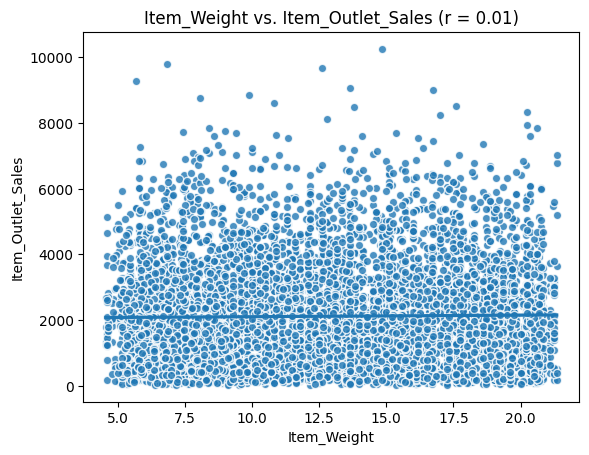

In [32]:
numeric_vs_target(df, x='Item_Weight');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Maybe people tend to buy light products, eventhough there's no clear indication.
- Does this feature appear to be a predictor of the target?
  - No. Almost no correlation.

####**Item_Fat_Content**: Whether the product is low-fat or regular

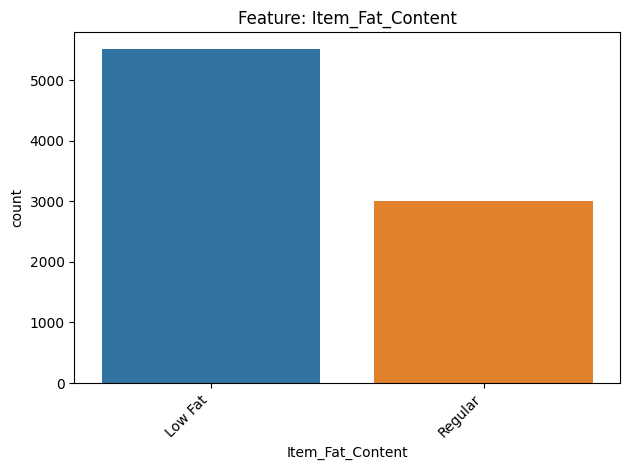


- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [33]:
explore_categorical(df, x='Item_Fat_Content');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 Null values (0%)

- Is the feature constant or quasi-constant?
  - Since the occurance of the most common value is below 98%, then Not constant or quasi-constant

- What is the cardinality? Is it high (>10)?
  - 2 (considered low cardinality)

- Would we know this feature before the target is determined?
  - Yes!

- Is there a business case/understanding reason to exclude based on our business case?
  - No, we can see what percentages products have according to fat content

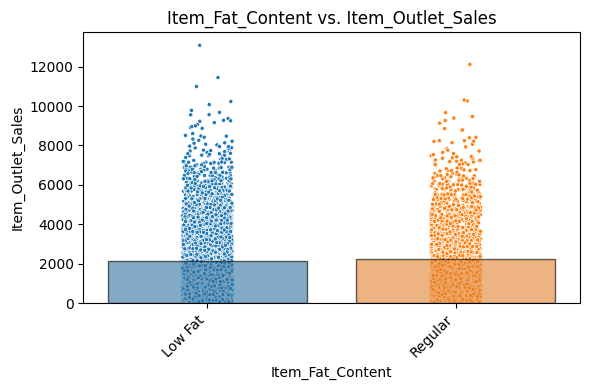

In [34]:
categorical_vs_target(df, x='Item_Fat_Content', figsize=(6,4));

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Not so clear, it may has an impact on product sales.
- Does this feature appear to be a predictor of the target?
  - NO

####**Item_Visibility**:	The percentage of total display area of all products in a store allocated to the particular product

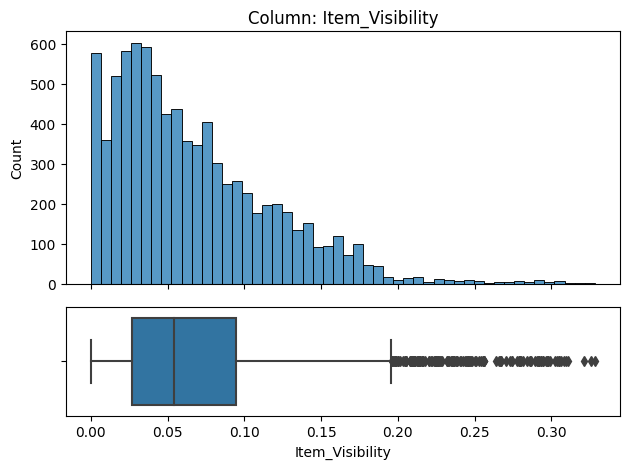

- NaN's Found: 0 (0.0%)


In [35]:
explore_numeric(df, x='Item_Visibility');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numerical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 Null values (0%)

- Would we know this feature before the target is determined?
  - Yes!

- Is there a business case/understanding reason to exclude based on our business case?
  - No, we can see total display area of all products in a store allocated to the particular product.

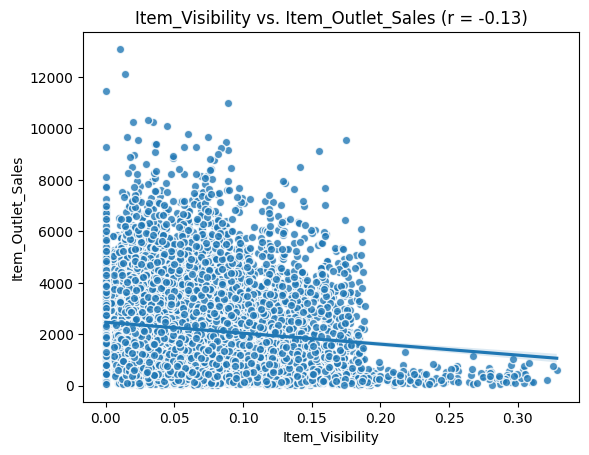

In [36]:
numeric_vs_target(df, x='Item_Visibility');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, why not? We can see that the more the total display area of all products in a store allocated to the particular product, the less the sales!!
- Does this feature appear to be a predictor of the target?
  - YES! Negative correlation

####**Item_Type**:	The category to which the product belongs

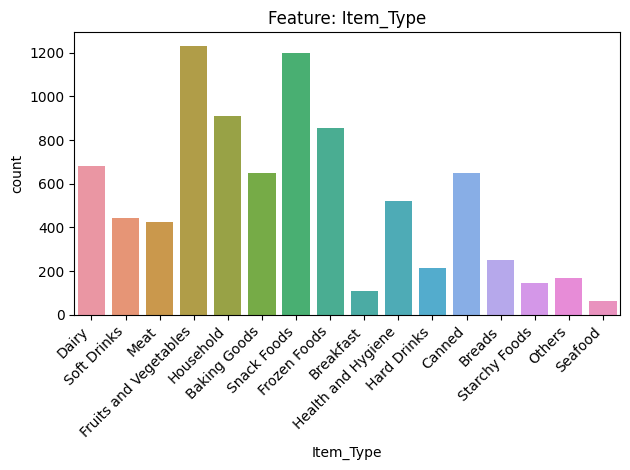


- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [37]:
explore_categorical(df, x='Item_Type');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 Null values (0%)

- Is the feature constant or quasi-constant?
  - Since the occurance of the most common value is below 98%, then Not constant or quasi-constant

- What is the cardinality? Is it high (>10)?
  - 16 (considered high cardinality)

- Would we know this feature before the target is determined?
  - Yes!

- Is there a business case/understanding reason to exclude based on our business case?
  - No. According to item types we can predict the sales.

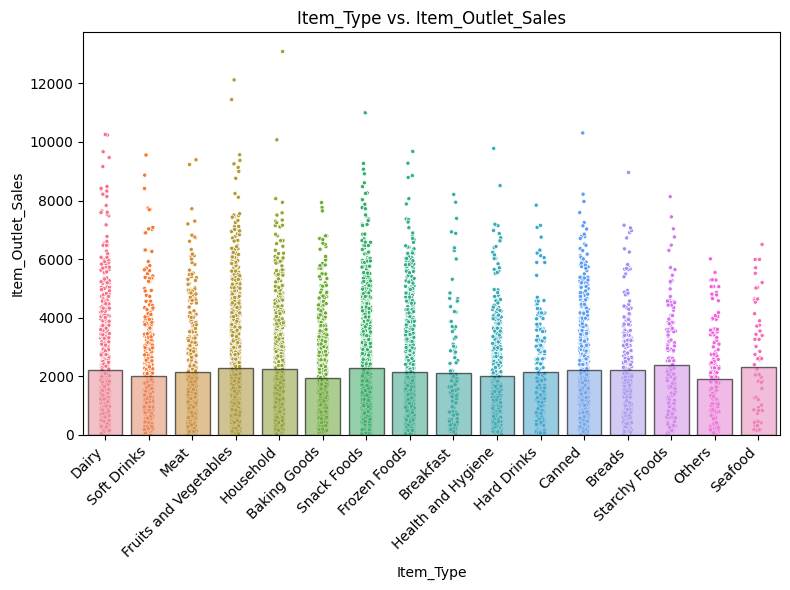

In [38]:
categorical_vs_target(df, x='Item_Type', y='Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - YES! We can predict the sales according to the type of food.
- Does this feature appear to be a predictor of the target?
  - I think yes, we can predict sales if the sales of some item are greater than another, but I don't think we can predict the actual sales.

####**Item_MRP**:	Maximum Retail Price (list price) of the product

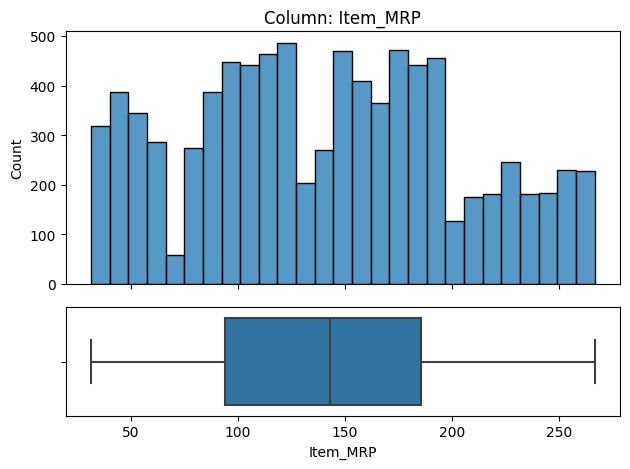

- NaN's Found: 0 (0.0%)


In [39]:
explore_numeric(df, x='Item_MRP');

- What type of feature is it? (Categorical (nominal), ordinal, numeric).
  - Numerical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 Null values (0%)

- Would we know this feature before the target is determined?
  - Yes!

- Is there a business case/understanding reason to exclude based on our business case?
  - No, lets us see the maximum retail price (list price) of the product.

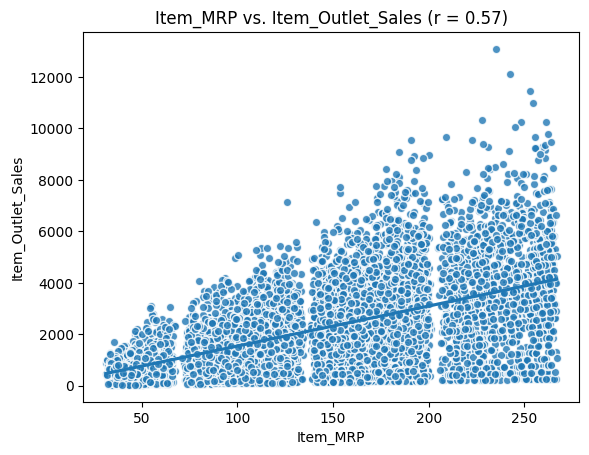

In [40]:
numeric_vs_target(df, x='Item_MRP');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes. We can see that the more the MRP the more the sales!!
- Does this feature appear to be a predictor of the target?
  - YES! Positive correlation

####**Outlet_Identifier**:	Store ID

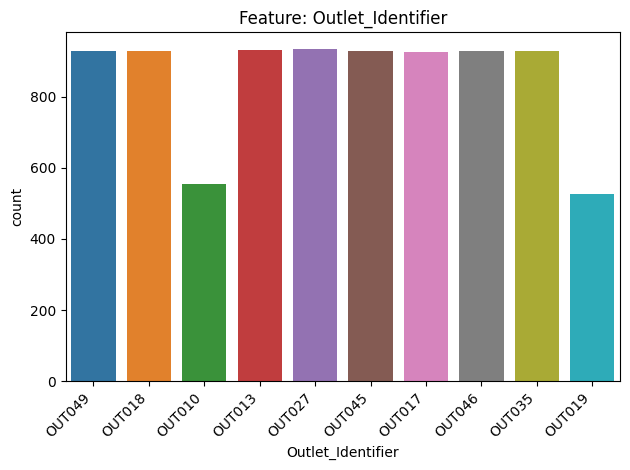


- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [41]:
explore_categorical(df, x='Outlet_Identifier');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 Null values (0%)

- Is the feature constant or quasi-constant?
  - Since the occurance of the most common value is below 98%, then Not constant or quasi-constant

- What is the cardinality? Is it high (>10)?
  - 10 (considered high cardinality)

- Would we know this feature before the target is determined?
  - Yes!

- Is there a business case/understanding reason to exclude based on our business case?
  - Yes, we don't need this feature to predict the sales.

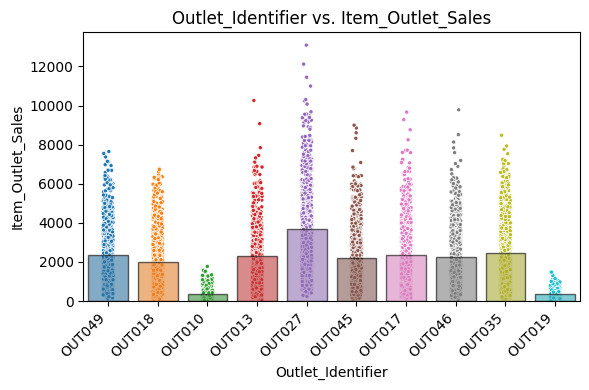

In [42]:
categorical_vs_target(df, x='Outlet_Identifier', figsize=(6,4));

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Not at all!
- Does this feature appear to be a predictor of the target?
  - NO

####**Outlet_Establishment_Year**:	The year in which store was established

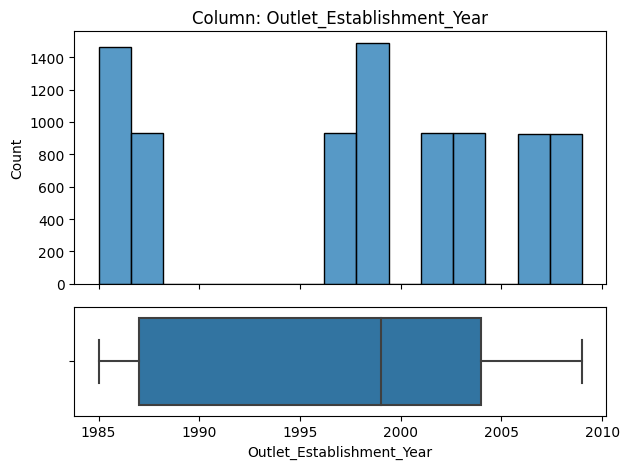

- NaN's Found: 0 (0.0%)


In [43]:
explore_numeric(df, x='Outlet_Establishment_Year');

- What type of feature is it? (Categorical (nominal), ordinal, numeric).
  - Numerical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 Null values (0%)

- Would we know this feature before the target is determined?
  - Yes!

- Is there a business case/understanding reason to exclude based on our business case?
  - Yes! I don't think we can benefit from knowing the year the store was built in.

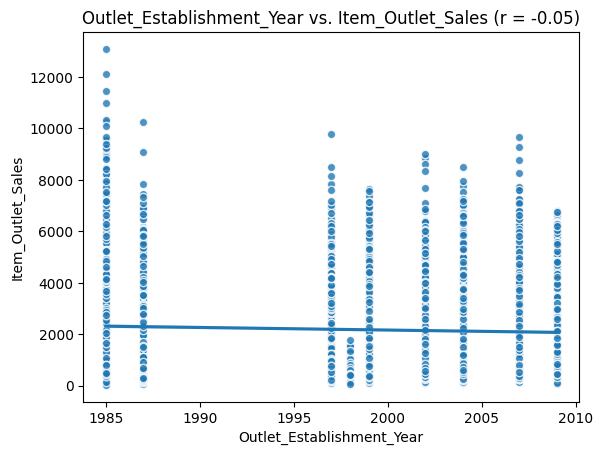

In [44]:
numeric_vs_target(df, x='Outlet_Establishment_Year');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No, there's no clear idea about the relation between the establishment year of the store and the sales.
- Does this feature appear to be a predictor of the target?
  - NO! You can see that there's almost no correlation.

####**Outlet_Size**:	The size of the store in terms of ground area covered

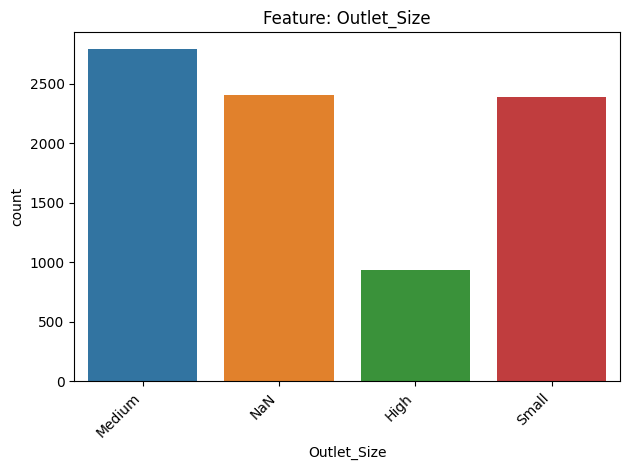


- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [45]:
explore_categorical(df, x='Outlet_Size');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 2410 (28.28%)

- Is the feature constant or quasi-constant?
  - Since the occurance of the most common value is below 98%, then Not constant or quasi-constant

- What is the cardinality? Is it high (>10)?
  - 4 (considered low cardinality)

- Would we know this feature before the target is determined?
  - Yes!

- Is there a business case/understanding reason to exclude based on our business case?
  - Maybe we can make use of it, since people always tend to buy small products more than large ones.

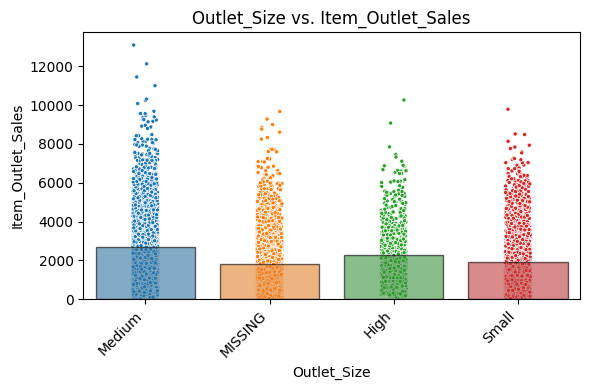

In [46]:
categorical_vs_target(df, x='Outlet_Size', figsize=(6,4));

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, maybe. Notice that the sales of the medium products are greater than large ones as we predicted, even though the average of large products is greater than the average of small ones, but the small products distribute over a wider range.
- Does this feature appear to be a predictor of the target?
  - Yes.

####**Outlet_Location_Type**:	The type of area in which the store is located

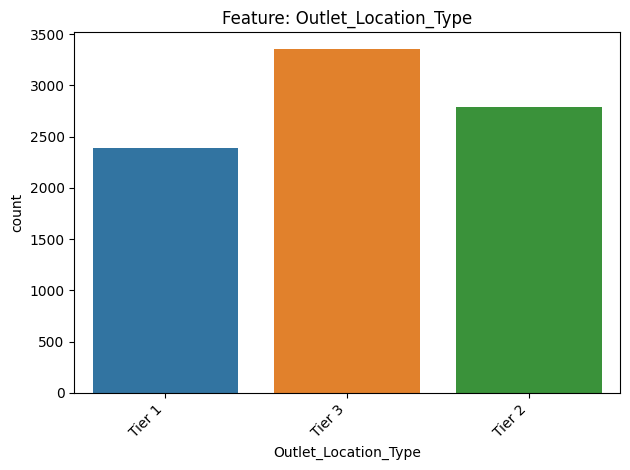


- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [47]:
explore_categorical(df, x='Outlet_Location_Type');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 (0%)

- Is the feature constant or quasi-constant?
  - Since the occurance of the most common value is below 98%, then Not constant or quasi-constant

- What is the cardinality? Is it high (>10)?
  - 3 (considered low cardinality)

- Would we know this feature before the target is determined?
  - Yes!

- Is there a business case/understanding reason to exclude based on our business case?
  - No, we can relate the type of area to the amount of sales, since lively areas are more likely to have greater sales (such as city centers).

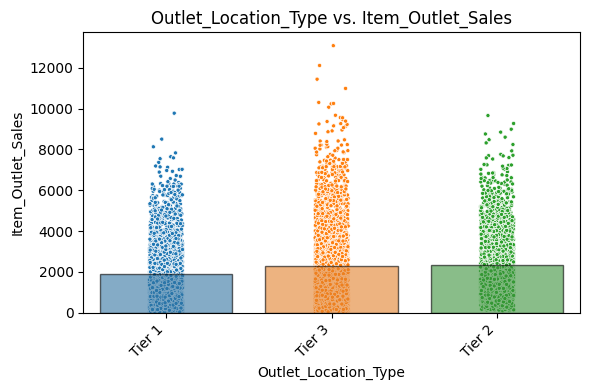

In [48]:
categorical_vs_target(df, x='Outlet_Location_Type', figsize=(6,4));

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, more lively areas are mor likely to have greater sales. As we can see from the plot, Tier 3 & 2 have more sales than Tier 1
- Does this feature appear to be a predictor of the target?
  - Yes.

####**Outlet_Type**:	Whether the outlet is a grocery store or some sort of supermarket

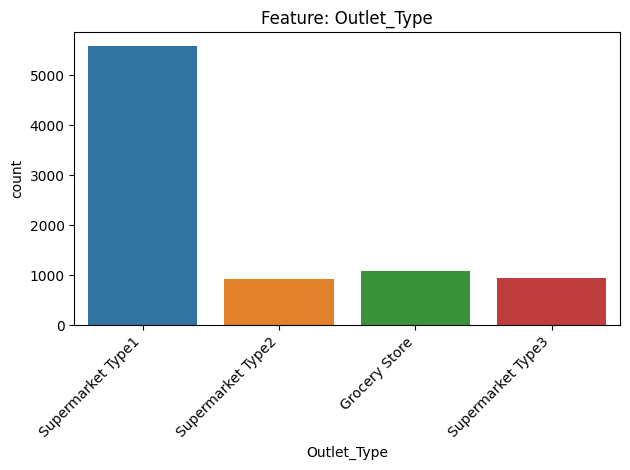


- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [49]:
explore_categorical(df, x='Outlet_Type');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 (0%)

- Is the feature constant or quasi-constant?
  - Since the occurance of the most common value is below 98%, then Not constant or quasi-constant

- What is the cardinality? Is it high (>10)?
  - 4 (considered low cardinality)

- Would we know this feature before the target is determined?
  - Yes!

- Is there a business case/understanding reason to exclude based on our business case?
  - No, maybe we can relate the type of the grocery store to the amount of sales.

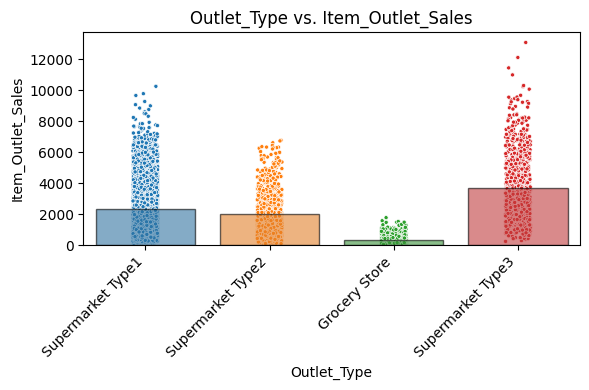

In [50]:
categorical_vs_target(df, x='Outlet_Type', figsize=(6,4));

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, supermarkets of type 3 have more sales than any other grocery store/supermarket.
- Does this feature appear to be a predictor of the target?
  - Yes.

# Preprocessing Data

In [51]:
# Import packages
import pandas as pd
import numpy as np
# load the data
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [52]:
# check data
df.duplicated().sum()
# no duplicated values

0

In [53]:
# checkm for null values
df.isna().sum()
# Item_Weight and Outlet_Size both have null values ---> must be imputed by SimpleImputer

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [54]:
# categorize features into numeric and categorical (ordinal and nominal)
num_cols = df.select_dtypes('number').columns
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [55]:
# check for inconsistencies for cat. features
df['Item_Fat_Content'].value_counts()
# There's inconsistency ----> must be fixed

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [56]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()
# now it's okay

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [57]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [58]:
df[['Item_Type','Outlet_Location_Type', 'Outlet_Type']].value_counts
# all good for inconsistencies

<bound method DataFrame.value_counts of                   Item_Type Outlet_Location_Type        Outlet_Type
0                     Dairy               Tier 1  Supermarket Type1
1               Soft Drinks               Tier 3  Supermarket Type2
2                      Meat               Tier 1  Supermarket Type1
3     Fruits and Vegetables               Tier 3      Grocery Store
4                 Household               Tier 3  Supermarket Type1
...                     ...                  ...                ...
8518            Snack Foods               Tier 3  Supermarket Type1
8519           Baking Goods               Tier 2  Supermarket Type1
8520     Health and Hygiene               Tier 2  Supermarket Type1
8521            Snack Foods               Tier 3  Supermarket Type2
8522            Soft Drinks               Tier 1  Supermarket Type1

[8523 rows x 3 columns]>

In [59]:
# now define ordinal features
ord_cols = ['Outlet_Size']
cat_cols = cat_cols.drop('Outlet_Size')
ord_cols

['Outlet_Size']

In [75]:
# import sklearn's packages
import numpy as np
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [61]:
# assign the target and the features matrix
y = df['Item_Outlet_Sales']
X = df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier'])
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [62]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [63]:
# redefine columns
num_cols = X_train.select_dtypes('number').columns
cat_cols = X_train.select_dtypes('object').columns.drop('Outlet_Size')
ord_cols = ['Outlet_Size']
ord_cols

['Outlet_Size']

We will use ColumnTransformer for the preprocessing

In [64]:
# now the preprocessing work
# Instantiate the SimpleImputer
# impute missing values with median for numeric data
impute_median = SimpleImputer(strategy='median')
# Instantiate StandardScaler
scaler = StandardScaler()
# make a pipeline for the numeric data
num_pipe = make_pipeline(impute_median, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [65]:
# create num_tuple
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

In [72]:
# preprocessing for ordinal data
# impute missing values with most_frequent
impute_ord = SimpleImputer(strategy='constant', fill_value='MISSING')
size_order = ['Small', 'Medium', 'High']
ordinal_category_order = [size_order]
# Instantiate Encoder
ord_encoder = OrdinalEncoder(categories=ordinal_category_order)
# Instantiate StandardScaler
scaler_ord = StandardScaler()
# Making an ord_pipe
ord_pipe = make_pipeline(impute_ord, ord_encoder, scaler_ord)
ord_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High']])),
                ('standardscaler', StandardScaler())])

In [67]:
# Making an ordinal_tuple
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['Small', 'Medium', 'High']])),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Size'])

In [68]:
# Preprocessing categorical data
# no data to impute (0 null), so we'll skip SimpleImputer
# Instantiate OneHotEncoder
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with encoder
ohe_pipe = make_pipeline(ohe_encoder)
ohe_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [69]:
# Making a ohe_tuple
ohe_tuple = ('categorical', ohe_pipe, cat_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
        'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'))

In [73]:
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple], verbose_feature_names_out=False)
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  Ord...tegories=[['Small',
                                                                              'Medium',
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [77]:
# Transform the training data
X_train_processed = col_transformer.transform(X_train)
# Transform the testing data
X_test_processed = col_transformer.transform(X_test)

# Modeling

1. Your first task is to build a linear regression model to predict sales.
* Build a linear regression model.
* Use the custom evaluation function to get the metrics for your model (on training and test data).
* Compare the training vs. test R-squared values and answer the question: to what extent is this model overfit/underfit?

In [78]:
# import the LinearRegression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_processed, y_train)

LinearRegression()

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)

  if verbose == True:
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")

  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True, output_frame=False):
  y_train_pred = reg.predict(X_train)
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose, output_dict=output_frame, label='Training Data')
  print()

  y_test_pred = reg.predict(X_test)
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose, output_dict=output_frame, label='Test Data' )

  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    results_df = results_df.set_index('Label')
    results_df.index.name=None
    return results_df.round(3)

In [82]:
evaluate_regression(linreg, X_train_processed, y_train, X_test_processed, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.179
- MSE = 1,297,565.727
- RMSE = 1,139.107
- R^2 = 0.562

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.120
- MSE = 1,194,355.766
- RMSE = 1,092.866
- R^2 = 0.567


* Both values for training and test data are considerably small, the R2 for the test data is a bit greater (model is underfit i.e can't predict the target well).

2. Your second task is to build a Random Forest model to predict sales.
* Build a default Random Forest model.
* Use the custom evaluation function to get the metrics for your model (on training and test data).
* Compare the training vs. test R-squared values and answer the question: to what extent is this model overfit/underfit?
* Compare this model's performance to the linear regression model: which model has the best test scores?

In [84]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

In [85]:
evaluate_regression(rf, X_train_processed, y_train, X_test_processed, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 296.124
- MSE = 182,241.944
- RMSE = 426.898
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 765.671
- MSE = 1,213,934.180
- RMSE = 1,101.787
- R^2 = 0.560


* The R2 for the training data is considerably greater than the R2 for test data, that means the model is overfit (model performs bad with unseen data).
* There's a minor change in the results for the test data, which is slightly better for the LinearRegression than RandomForest, tho, the R2 for the training data has got much better.

3. Use GridSearchCV to tune at least two hyperparameters for a Random Forest model.
* After determining the best parameters from your GridSearch, fit and evaluate a final best model on the entire training set (no folds).
* Compare your tuned model to your default Random Forest: did the performance improve?

In [87]:
from sklearn.model_selection import GridSearchCV
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [108]:
# choose 2 hyperparameters to be tuned: max_depth, max_samples
params = {'max_depth':[300,400,500,600],
          'max_samples':[200,300,400]}
gridsearch = GridSearchCV(rf, params, n_jobs=-1, cv=2, verbose=1)
gridsearch.fit(X_train_processed, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [300, 400, 500, 600],
                         'max_samples': [200, 300, 400]},
             verbose=1)

In [109]:
gridsearch.best_params_

{'max_depth': 300, 'max_samples': 300}

In [110]:
best_rf = gridsearch.best_estimator_
evaluate_regression(best_rf, X_train_processed, y_train, X_test_processed, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 734.766
- MSE = 1,093,181.460
- RMSE = 1,045.553
- R^2 = 0.631

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 734.918
- MSE = 1,116,137.201
- RMSE = 1,056.474
- R^2 = 0.595


* The model after tuning must be improved.

4. You now have tried several different models on your data set. You need to determine which model to implement.
* Overall, which model do you recommend?
* Justify your recommendation.
* In a Markdown cell:
  * Interpret your model's performance based on R-squared in a way that your non-technical stakeholder can understand.
  * Select another regression metric (RMSE/MAE/MSE) to express the performance of your model to your stakeholder.
  * Include why you selected this metric to explain to your stakeholder.
  * Compare the training vs. test scores and answer the question: to what extent is this model overfit/underfit?


* The RandomForest model is recommended because it predits the model well.
* The R2 score is a percentage of how close the model to real target values, so the higher the R2 for test data the closer the model to actual values.
* The Mean Absolute Error.
* MAE represents the mean of abolute errors i.e. the sum of differences between the predicted value and the actual value. Here the MAE is considered low, i.e. small errors or small differences.
* The values are close to each other, in other words, the model performs well with unseen values, and it's a good model (neither underfit nor overfit).